In [1]:
index_cd = 'KPI200'
page_n = 1
naver_index = 'https://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n)

In [2]:
naver_index

'https://finance.naver.com/sise/sise_index_day.nhn?code=KPI200&page=1'

In [3]:
from urllib.request import urlopen
source = urlopen(naver_index).read()

In [4]:
import bs4

In [5]:
source = bs4.BeautifulSoup(source,'html.parser')

In [6]:
print(source.prettify())

<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   네이버 금융
  </title>
  <link href="/css/newstock.css?20190314132334" rel="stylesheet" type="text/css"/>
  <link href="/css/common.css?20190314132334" rel="stylesheet" type="text/css"/>
  <link href="/css/layout.css?20190314132334" rel="stylesheet" type="text/css"/>
  <link href="/css/main.css?20190314132334" rel="stylesheet" type="text/css"/>
  <link href="/css/newstock2.css?20190314132334" rel="stylesheet" type="text/css"/>
  <link href="/css/newstock3.css?20190314132334" rel="stylesheet" type="text/css"/>
  <link href="/css/world.css?20190314132334" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <script src="/js/jindo.min.ns.1.5.3.euckr.js?20190314132334" type="text/javascript">
  </script>
  <script src="/js/lcslog.js?20190314132334" type="text/javascript">
  </script>
  <!-- 일별시세 -->
  <div class="box_type_m">
   <h4 class="top_tlt" style="text-align:left;">
    <em>
   

In [7]:
td = source.find_all('td')   #td 태그를 골라서 td변수에 저장
len(td)  #갯수 체크

54

In [8]:
#/html/body/div/table[1]/tbody/tr[3]/td[1] Xpath로 특정일 가져옴
source.find_all('table')[0].find_all('tr')[2].find_all('td')[0]

<td class="date">2019.03.14</td>

In [9]:
d = source.find_all('td', class_ = 'date')[0].text
d

'2019.03.14'

In [10]:
import datetime as dt

In [11]:
yyyy = int(d.split('.')[0])
mm = int(d.split('.')[1])
dd = int(d.split('.')[2])
this_date = dt.date(yyyy, mm, dd)
this_date

datetime.date(2019, 3, 14)

In [12]:
def date_format(d):                #지속적으로 변환, 함수지정해주기
    d = str(d).replace('-','.')
    yyyy = int(d.split('.')[0])
    mm = int(d.split('.')[1])
    dd = int(d.split('.')[2])
    
    this_date = dt.date(yyyy, mm, dd)
    return this_date

In [13]:
#/html/body/div/table[1]/tbody/tr[3]/td[2]
this_close = source.find_all('table')[0].find_all('tr')[2].find_all('td')[1].text
this_close = this_close.replace(',','') #쉼표 제거
this_close = float(this_close)
this_close

276.64

In [14]:
p = source.find_all('td', class_ = 'number_1')[0].text
p

'276.64'

In [15]:
dates = source.find_all('td', class_ = 'date')
prices = source.find_all('td', class_ = 'number_1')

In [16]:
len(dates) #소스코드에서 한개->6

6

In [17]:
len(prices)  #소스코드에서 4개->24

24

In [18]:
dates

[<td class="date">2019.03.14</td>,
 <td class="date">2019.03.13</td>,
 <td class="date">2019.03.12</td>,
 <td class="date">2019.03.11</td>,
 <td class="date">2019.03.08</td>,
 <td class="date">2019.03.07</td>]

In [19]:
for n in range(len(dates)):        #dates 개수만큼 반복
    this_date = dates[n].text       #데이터(list 형) n번째 값 추출
    this_date = date_format(this_date)     #날짜형식으로 변환
    
    this_close = prices[n*4].text   #dates 보다 4배 많으므로 고려
    this_close = this_close.replace(',','') #쉼표 제거
    this_close = float(this_close)
    this_close
    
    print(this_date, this_close)       #total 6개 발생

2019-03-14 276.64
2019-03-13 276.0
2019-03-12 277.73
2019-03-11 275.06
2019-03-08 274.84
2019-03-07 278.87


In [20]:
paging = source.find('td', class_ = 'pgRR').find('a')['href']
paging

'/sise/sise_index_day.nhn?code=KPI200&page=544'

In [21]:
paging = paging.split('&')[1]

In [22]:
paging

'page=544'

In [23]:
paging = paging.split('=')[1]

In [24]:
paging

'544'

In [25]:
last_page = source.find('td', class_ = 'pgRR').find('a')['href']
last_page = last_page.split('&')[1]
last_page = last_page.split('=')[1]
last_page = int(last_page)

In [26]:
#데이터 추출 함수
def historical_index_naver(index_cd, start_date = '', end_date = '', page_n = 1, last_page = 0):
    
    if start_date:
        start_date = date_format(start_date)
    else:
        start_date = dt.date.today()
    
    if end_date:
        end_date = date_format(end_date)
    else:
        end_date = dt.date.today()
    
    naver_index = 'https://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n)
    
    source = urlopen(naver_index).read()
    source = bs4.BeautifulSoup(source, 'lxml')
    
    dates = source.find_all('td', class_ = 'date')
    prices = source.find_all('td', class_ = 'number_1')
    
    for n in range(len(dates)):
        
        if dates[n].text.split('.')[0].isdigit():
            
            #날짜처리
            this_date = dates[n].text
            this_date = date_format(this_date)
            
            #종가처리
            this_close = prices[n*4].text
            this_close = this_close.replace(',','')
            this_close = float(this_close)
            
            #딕셔너리 저장
            historical_prices[this_date] = this_close
            
    #페이지 네비게이션
    if last_page == 0:
        last_page = source.find('td', class_ = 'pgRR').find('a')['href']
        #마지막 페이지 추출
        last_page = last_page.split('&')[1]
        last_page = last_page.split('=')[1]
        last_page = int(last_page)
        
    #다음 페이지 호출
    if page_n < last_page:
        page_n = page_n + 1
        historical_index_naver(index_cd, start_date, end_date, page_n, last_page)
        
    return historical_prices

In [27]:
index_cd = 'KPI200'
historical_prices = dict()
historical_index_naver(index_cd, '2018-4-1', '2018-4-4')
historical_prices

{datetime.date(2019, 3, 14): 276.64,
 datetime.date(2019, 3, 13): 276.0,
 datetime.date(2019, 3, 12): 277.73,
 datetime.date(2019, 3, 11): 275.06,
 datetime.date(2019, 3, 8): 274.84,
 datetime.date(2019, 3, 7): 278.87,
 datetime.date(2019, 3, 6): 279.85,
 datetime.date(2019, 3, 5): 280.45,
 datetime.date(2019, 3, 4): 282.51,
 datetime.date(2019, 2, 28): 283.8,
 datetime.date(2019, 2, 27): 288.76,
 datetime.date(2019, 2, 26): 287.89,
 datetime.date(2019, 2, 25): 289.0,
 datetime.date(2019, 2, 22): 288.74,
 datetime.date(2019, 2, 21): 288.41,
 datetime.date(2019, 2, 20): 288.4,
 datetime.date(2019, 2, 19): 284.91,
 datetime.date(2019, 2, 18): 285.9,
 datetime.date(2019, 2, 15): 283.98,
 datetime.date(2019, 2, 14): 288.68,
 datetime.date(2019, 2, 13): 284.97,
 datetime.date(2019, 2, 12): 283.69,
 datetime.date(2019, 2, 11): 282.1,
 datetime.date(2019, 2, 8): 281.49,
 datetime.date(2019, 2, 7): 285.65,
 datetime.date(2019, 2, 1): 285.79,
 datetime.date(2019, 1, 31): 285.89,
 datetime.date(

In [28]:
from urllib.request import urlopen
import bs4

In [29]:
url = 'http://finance-service.daum.net/global/index_daily.daum?type=default&ric=/.GSPC&page=1'

source = urlopen(url).read()
source = bs4.BeautifulSoup(source, 'lxml')

In [30]:
dates = source.find_all('td', class_ = 'datetime')
dates

[<td class="datetime">2019.01.08</td>,
 <td class="datetime">2019.01.07</td>,
 <td class="datetime">2019.01.04</td>,
 <td class="datetime">2019.01.03</td>,
 <td class="datetime">2019.01.02</td>,
 <td class="datetime">2018.12.31</td>,
 <td class="datetime">2018.12.28</td>,
 <td class="datetime">2018.12.27</td>,
 <td class="datetime">2018.12.26</td>,
 <td class="datetime">2018.12.24</td>]

In [31]:
prices = source.find_all('td', class_ = 'num')
print(len(dates))                            #dates 1개에 prices 3개
print(len(prices))

10
30


In [32]:
prices[0].text

'    \n\t\t    \t     \t     \t         \t\t\t            \t            \t            \t\t\t\t\t\t\t\t\t            \t\t\t\t\t\t\t2,574.41'

In [33]:
def historical_global_daum(index_cd, start_date = '', end_date = '', page_n = 1, last_page = 0):
    
    if start_date:
        start_date = date_format(start_date)
    else:
        start_date = dt.date.today()
    
    if end_date:
        end_date = date_format(end_date)
    else:
        end_date = dt.date.today()
        
    url = 'http://finance-service.daum.net/global/index_daily.daum?type=default&ric=/.' + index_cd + '&page=' + str(page_n)
    
    source = urlopen(url).read()
    source = bs4.BeautifulSoup(source, 'lxml')
    
    dates = source.find_all('td', class_ = 'datetime')
    
    prices = source.find_all('td', class_ = 'num')
    
    rows_in_page = len(dates) #페이지당 목록수는 날짜 길이로
    
    if len(dates) > 0:
        for n in range(rows_in_page):
            
            #날짜 처리
            this_date = dates[n].text
            this_date = date_format(this_date)
            
            if start_date <= this_date <= end_date:
                
                #데이터 처리
                this_close = prices[n*3].text
                this_close = this_close.replace(' ','')
                this_close = this_close.replace('\t','')
                this_close = this_close.replace('\n','')
                this_close = this_close.replace(',','')
                this_close = float(this_close)
                
                historical_prices[this_date] = this_close #딕셔너리 저장
            
            elif this_date < start_date:
                return historical_prices
                
        if rows_in_page == 10:
            page_n = int(page_n)
            page_n = page_n + 1
            
            historical_global_daum(index_cd, start_date, end_date, page_n, last_page)
            
        return historical_prices

In [34]:
historical_prices = dict()
daum = historical_global_daum('GSPC', '2018-4-1', '2018-4-5')
#before reference assignment -> 변수 할당 문제 / 해결완료

In [35]:
daum

{datetime.date(2018, 4, 5): 2662.84,
 datetime.date(2018, 4, 4): 2644.69,
 datetime.date(2018, 4, 3): 2614.45,
 datetime.date(2018, 4, 2): 2581.88}

In [36]:
index_cd = 'KPI200'
historical_prices = dict()
kospi200 = historical_index_naver(index_cd, '2017-1-1','2017-12-31')

In [37]:
index_cd = 'GSPC'
historical_prices = dict()
sp500 = historical_global_daum(index_cd, '2017-1-1', '2017-12-31')

In [38]:
tmp = {"S&P500": sp500, "KOSPI200": kospi200}
tmp       #dict 타입의 S&P500 과 KOSPI200 만듬

{'S&P500': {datetime.date(2017, 12, 29): 2673.61,
  datetime.date(2017, 12, 28): 2687.54,
  datetime.date(2017, 12, 27): 2682.62,
  datetime.date(2017, 12, 26): 2680.5,
  datetime.date(2017, 12, 22): 2683.34,
  datetime.date(2017, 12, 21): 2684.57,
  datetime.date(2017, 12, 20): 2679.25,
  datetime.date(2017, 12, 19): 2681.47,
  datetime.date(2017, 12, 18): 2690.16,
  datetime.date(2017, 12, 15): 2675.81,
  datetime.date(2017, 12, 14): 2652.01,
  datetime.date(2017, 12, 13): 2662.85,
  datetime.date(2017, 12, 12): 2664.11,
  datetime.date(2017, 12, 11): 2659.99,
  datetime.date(2017, 12, 8): 2651.5,
  datetime.date(2017, 12, 7): 2636.98,
  datetime.date(2017, 12, 6): 2629.27,
  datetime.date(2017, 12, 5): 2629.57,
  datetime.date(2017, 12, 4): 2639.44,
  datetime.date(2017, 12, 1): 2642.22,
  datetime.date(2017, 11, 30): 2647.58,
  datetime.date(2017, 11, 29): 2626.07,
  datetime.date(2017, 11, 28): 2627.04,
  datetime.date(2017, 11, 27): 2601.42,
  datetime.date(2017, 11, 24): 2602.42

In [39]:
import pandas as pd

In [40]:
df = pd.DataFrame(tmp)

In [41]:
df

,S&P500,KOSPI200
2006-01-03,NaN,178.81
2006-01-04,NaN,179.91
2006-01-05,NaN,178.82
2006-01-06,NaN,180.87
2006-01-09,NaN,180.30
2006-01-10,NaN,178.98
2006-01-11,NaN,178.67
2006-01-12,NaN,179.65
2006-01-13,NaN,181.71
2006-01-16,NaN,182.39


In [42]:
df = df.fillna(method = 'ffill')
if df.isnull().values.any():
    df = df.fillna(method = 'bfill')
    
df

,S&P500,KOSPI200
2006-01-03,2257.83,178.81
2006-01-04,2257.83,179.91
2006-01-05,2257.83,178.82
2006-01-06,2257.83,180.87
2006-01-09,2257.83,180.30
2006-01-10,2257.83,178.98
2006-01-11,2257.83,178.67
2006-01-12,2257.83,179.65
2006-01-13,2257.83,181.71
2006-01-16,2257.83,182.39


In [43]:
index_cd = 'KPI200'
historical_prices = dict()
kospi200 = historical_index_naver(index_cd, '2008-1-1', '2017-12-31')

In [44]:
index_cd = 'GSPC'
historical_prices = dict()
sp500 = historical_global_daum(index_cd, '2008-1-1', '2017-12-31')

In [45]:
tmp = {"S&P500": sp500, "KOSPI200": kospi200}

In [46]:
df = pd.DataFrame(tmp)

In [47]:
df = df.fillna(method='ffill')
if df.isnull().values.any():
    df = df.fillna(method='bfill')

In [48]:
df.head()

,S&P500,KOSPI200
2006-01-03,1447.16,178.81
2006-01-04,1447.16,179.91
2006-01-05,1447.16,178.82
2006-01-06,1447.16,180.87
2006-01-09,1447.16,180.30


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

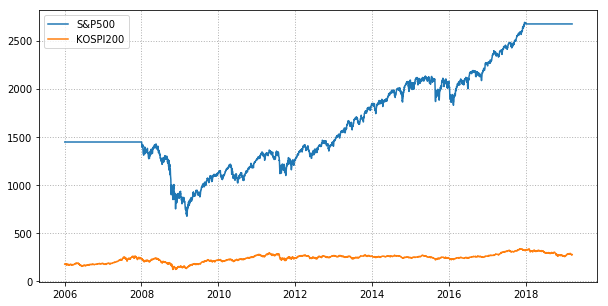

In [50]:
plt.figure(figsize = (10,5))
plt.plot(df['S&P500'])
plt.plot(df['KOSPI200'])
plt.legend(loc = 0)  #범례 위치 지정
plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1) #그리드 설정

In [51]:
df.iloc[0] #인덱스로 위치지정

S&P500      1447.16
KOSPI200     178.81
Name: 2006-01-03, dtype: float64

In [52]:
df.loc[dt.date(2008,1,2)] #값(날짜)로 지정

S&P500      1447.16
KOSPI200     235.30
Name: 2008-01-02, dtype: float64

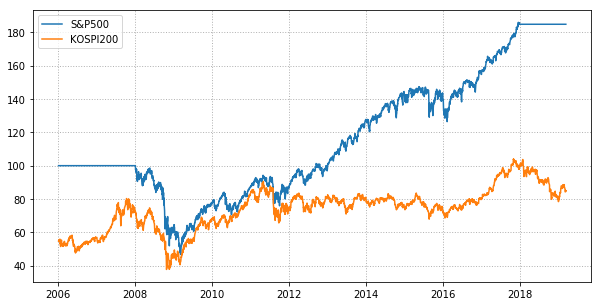

In [53]:
plt.figure(figsize=(10,5))
plt.plot(df['S&P500'] / df['S&P500'].loc[dt.date(2008,1,2)] * 100)
plt.plot(df['KOSPI200'] / df['KOSPI200'].loc[dt.date(2018,1,2)] * 100)
plt.legend(loc = 0)
plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)

In [54]:
df_ratio_2016_now = df.loc[dt.date(2016,1,1):] / df.loc[dt.date(2016,1,4)] * 100
df_ratio_2016_now.head(3)

,S&P500,KOSPI200
2016-01-04,100.000000,100.000000
2016-01-05,100.201226,100.639304
2016-01-06,98.887045,99.987214


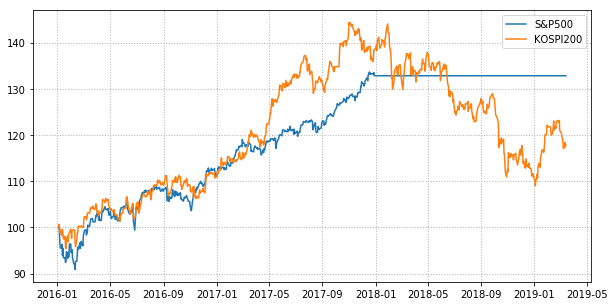

In [55]:
plt.figure(figsize=(10,5))
plt.plot(df_ratio_2016_now['S&P500'])
plt.plot(df_ratio_2016_now['KOSPI200'])
plt.legend(loc = 0)
plt.grid(True, color='0.7', linestyle = ':', linewidth = 1)

Text(0,0.5,'KOSPI200')

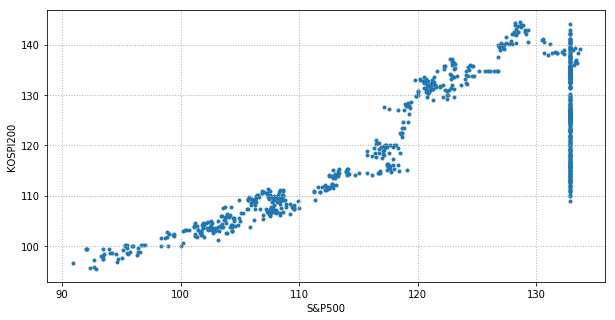

In [56]:
plt.figure(figsize=(10,5))
plt.scatter(df_ratio_2016_now['S&P500'], df_ratio_2016_now['KOSPI200'], marker = '.')
plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)
plt.xlabel('S&P500')
plt.ylabel('KOSPI200')

In [57]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = df_ratio_2016_now['S&P500']
y = df_ratio_2016_now['KOSPI200']

#np.array 변환
independent_var = np.array(x).reshape(-1,1)
dependent_var = np.array(y).reshape(-1,1)

regr = LinearRegression()
regr.fit(independent_var, dependent_var)

result = {'Slope': regr.coef_[0,0], 'Intercept': regr.intercept_[0], 'R^2':regr.score(independent_var, dependent_var)}
#기울기, 상관계수, 절편, 결정계수
result

{'Slope': 0.8108112243666674,
 'Intercept': 23.1179555489843,
 'R^2': 0.6219809718340161}

Text(0,0.5,'KOSPI200')

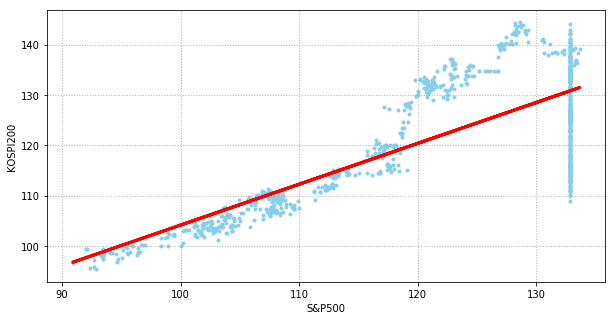

In [58]:
plt.figure(figsize=(10,5))
plt.scatter(independent_var, dependent_var, marker = '.', color = 'skyblue')
plt.plot(independent_var, regr.predict(independent_var), color = 'r', linewidth = 3)
plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)
plt.xlabel('S&P500')
plt.ylabel('KOSPI200')